In [56]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [3]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 "Alessandro's Work",
 'Literature',
 'Mikhail_Bandurist_Transistors',
 'Radiation Safety Course',
 'Sample from Strasbourg',
 'Untitled.ipynb']

In [5]:
os.listdir("Mikhail_Bandurist_Transistors/Sample12_device3_15122023")

['01_Sample12_device3_trfSat_dark.dat',
 '02_Sample12_device3_trfSat_dark.dat',
 '03_Sample6_device1_trfSat_dark.dat',
 '04_Sample12_device3_trfSat_dark.dat',
 '05_Sample12_device3_trfSat_dark.dat',
 '06_Sample12_device3_trfSat_dark.dat',
 '07_Sample12_device3_trfSat_dark.dat',
 '08_Sample12_device3_trfSat_dark.dat',
 '09_Sample12_device3_trfSat_dark.dat',
 '10_Sample12_device3_trfSat_dark_vert_foil.csv',
 '12_Sample12_device3_It_150kV_VDrain1V_VGate1V.dat',
 '13_Sample12_device3_trfSat_dark_vert_foil.dat',
 '14_Sample12_device3_It_150kV_VDrain1V_VGate2V.dat',
 '15_Sample12_device3_trfSat_dark_vert_foil.dat',
 '16_Sample12_device3_It_150kV_VDrain1V_VGate3V.dat',
 '17_Sample12_device3_trfSat_dark_vert_foil.dat',
 '18_Sample12_device3_It_150kV_VDrain1V_VGate5V.dat',
 '19_Sample12_device3_trfSat_dark_vert_foil.dat',
 '20_Sample12_device3_It_150kV_VDrain1V_VGate10V.dat',
 '21_Sample12_device3_trfSat_dark.dat',
 '22_Sample12_device3_It_150kV_VDrain1V_VGate15V.csv',
 '23_Sample12_device3_trf

In [6]:
PATH = "Mikhail_Bandurist_Transistors/Sample12_device3_15122023/34_Sample12_device3_It_150kV_VDrain1V_VGate45V.dat"

In [30]:
df = pd.read_table(PATH, header=10)

Index(['Time(ms)', 'Vdrain(V)', 'Idrain(A)', 'Vgate(V)', 'Igate(A)'], dtype='object')

In [34]:
df.sample(10)

,Time(ms),Vdrain(V),Idrain(A),Vgate(V),Igate(A)
220,110500.0,1.0,3.345200e-07,45.0,3.536800e-11
1412,707000.0,1.0,5.065300e-09,45.0,8.904300e-11
1614,808000.0,1.0,4.777600e-09,45.0,1.659400e-08
1241,621500.0,1.0,6.493300e-09,45.0,7.256000e-11
1307,654500.0,1.0,7.101700e-09,45.0,1.074200e-08
708,354500.0,1.0,2.237800e-08,45.0,3.385000e-11
1042,522000.0,1.0,7.757000e-09,45.0,5.480600e-11
105,53000.0,1.0,6.257900e-07,45.0,4.007800e-11
1472,737000.0,1.0,5.544200e-09,45.0,1.368700e-08
383,192000.0,1.0,1.264200e-07,45.0,3.440600e-11


In [36]:
df.value_counts()

Time(ms)  Vdrain(V)  Idrain(A)     Vgate(V)  Igate(A)    
0.0       1.0        1.239600e-06  45.0      4.819700e-10    1
621000.0  1.0        6.522500e-09  45.0      7.166900e-11    1
606000.0  1.0        5.532900e-09  45.0      7.264700e-11    1
605500.0  1.0        5.425300e-09  45.0      7.232300e-11    1
605000.0  1.0        5.537900e-09  45.0      7.232100e-11    1
                                                            ..
299000.0  1.0        3.857300e-08  45.0      3.388200e-11    1
298500.0  1.0        3.891000e-08  45.0      3.367500e-11    1
298000.0  1.0        3.889400e-08  45.0      3.419300e-11    1
297500.0  1.0        3.900600e-08  45.0      3.430400e-11    1
902500.0  1.0        4.401400e-09  45.0      1.060200e-10    1
Length: 1804, dtype: int64

In [37]:
df.shape

(1804, 5)

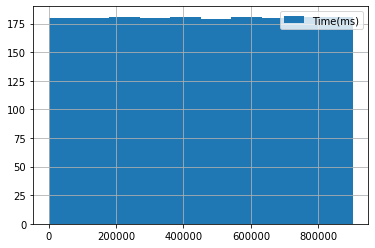

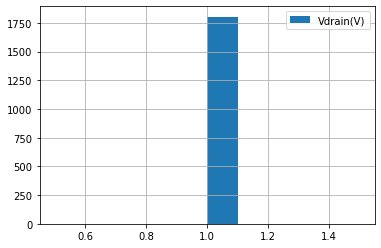

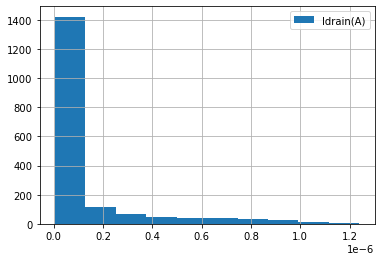

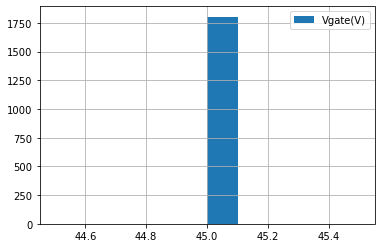

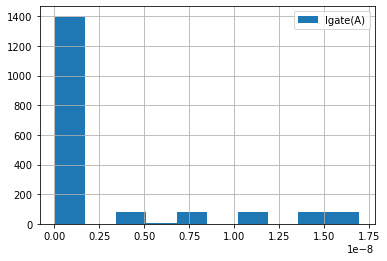

In [48]:
for col in df.columns:
    plt.figure()
    ax = plt.gca()
    df[col].hist(ax=ax, legend=col)

<AxesSubplot:xlabel='Time(ms)'>

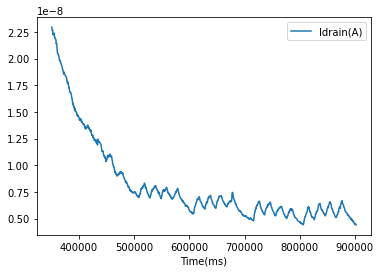

In [55]:
df.iloc[700:].plot(x="Time(ms)", y="Idrain(A)")

In [94]:
arr = df["Idrain(A)"]

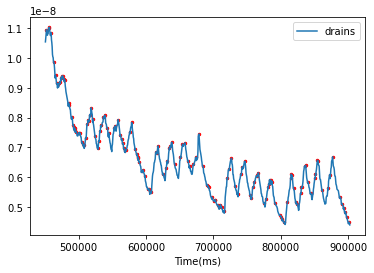

In [225]:
i = 900
peaks, _ = find_peaks(arr)
ax = plt.gca()
peaks = peaks[peaks > i]
df.iloc[i:].plot(x="Time(ms)", y="Idrain(A)", ax=ax, label="drains")
ax.scatter(df["Time(ms)"][peaks], df["Idrain(A)"][peaks], marker = 'o', s = 6, color = 'r', zorder=1)